## Poynting flux with MMS (SCM and EDP) data

This notebook computes the Poynting flux for waves between Fmin and Fmax in time domain as well as in Fourier domain in GSE as well as in field-aligned coordinates (FAC).

This is based on the IDL version by O. Le Contel, July 2017  (mms_poynting_flux_crib.pro)

In [ ]:
!pip install pyspedas

In [2]:
import pyspedas
from pytplot import tplot

Set a time range

In [3]:
starting_time = '2015-10-16/13:05:40.000000' # Magnetospheric Whistler waves at 600 Hz in burst mode (brst) propagating parallel to B0
ending_time = '2015-10-16/13:05:50.000000'


# starting_time ='13:00:00.000000' # Multiple MPause crossings in survey mode (srvy)
# ending_time   ='13:10:00.000000'

trange = [starting_time, ending_time]

Set some data options

In [4]:
probe = '1'
data_rate_input = 'brst'

Create the variable names based on the input above

In [5]:
mag_data_rate = data_rate_input
mag_level = 'l2'
mag_name = 'mms'+probe+'_fgm_b_gse_'+ mag_data_rate+'_'+mag_level

In [6]:
if data_rate_input == 'brst':
  n_sample = 8192
else:
  n_sample = 32

In [7]:
edp_level = 'l2'
if data_rate_input == 'srvy':
  edp_data_rate = 'fast'
else:
  edp_data_rate = data_rate_input

edp_name = 'mms'+probe+ '_edp_dce_gse_'+edp_data_rate+'_'+ edp_level 

In [8]:
scm_data_rate = data_rate_input

if scm_data_rate == 'brst':
  scm_datatype = 'scb'
else:
  scm_datatype = 'scsrvy'

scm_name = 'mms'+probe+'_scm_acb_gse_'+scm_datatype+'_'+scm_data_rate+'_l2'

Set the frequencies for band-pass filtering applied on EDP and SCM waveforms used in time domain as well as in Fourier domain

In [9]:
if data_rate_input == 'brst':
  nfft = 256
  Fsamp = 8192
else:
  nfft = 32
  Fsamp = 32

Fmin = 1.0/(float(nfft)/Fsamp)
Fmax = Fsamp/2.0

In [10]:
if data_rate_input == 'brst':
  n_log_freq = 1
else:
  n_log_freq = 0

Load L2 FGM data

In [11]:
pyspedas.mms.fgm(probe=probe, data_rate=mag_data_rate, trange=trange, time_clip=True)

SDC username (blank for public access): 


05-Jul-22 21:10:13: Downloading mms1_fgm_brst_l2_20151016130524_v4.18.1.cdf to pydata/mms1/fgm/brst/l2/2015/10/16


The lengths of x and y do not match!
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
Time clip was applied to: mms1_fgm_b_gse_brst_l2
Time clip was applied to: mms1_fgm_b_gsm_brst_l2
Time clip was applied to: mms1_fgm_b_dmpa_brst_l2
Time clip was applied to: mms1_fgm_b_bcs_brst_l2
Time clip was applied to: mms1_fgm_flag_brst_l2
Problem time clipping: mms1_fgm_r_gse_brst_l2
Problem time clipping: mms1_fgm_r_gsm_brst_l2
Time clip was applied to: mms1_fgm_hirange_brst_l2
Time clip was applied to: mms1_fgm_bdeltahalf_brst_l2
Time clip was applied to: mms1_fgm_stemp_brst_l2
Time clip was applied to: mms1_fgm_etemp_brst_l2
Time clip was applied to: mms1_fgm_mode_brst_l2
Time clip error: No pytplot names were provided.
Loaded variables:
Epoch
mms1_fgm_b_gse_brst_l2
mms1_fgm_b_gsm_brst_l2
mms1_fgm_b_dmpa_brst_l2
mms1

['Epoch',
 'mms1_fgm_b_gse_brst_l2',
 'mms1_fgm_b_gsm_brst_l2',
 'mms1_fgm_b_dmpa_brst_l2',
 'mms1_fgm_b_bcs_brst_l2',
 'mms1_fgm_flag_brst_l2',
 'Epoch_state',
 'mms1_fgm_hirange_brst_l2',
 'mms1_fgm_bdeltahalf_brst_l2',
 'mms1_fgm_stemp_brst_l2',
 'mms1_fgm_etemp_brst_l2',
 'mms1_fgm_mode_brst_l2',
 'mms1_fgm_rdeltahalf_brst_l2',
 'mms1_fgm_b_dmpa_brst_l2_bvec',
 'mms1_fgm_b_dmpa_brst_l2_btot',
 'mms1_fgm_b_gse_brst_l2_bvec',
 'mms1_fgm_b_gse_brst_l2_btot',
 'mms1_fgm_b_gsm_brst_l2_bvec',
 'mms1_fgm_b_gsm_brst_l2_btot',
 'mms1_fgm_b_bcs_brst_l2_bvec',
 'mms1_fgm_b_bcs_brst_l2_btot']

Load L2 EDP data

In [12]:
pyspedas.mms.edp(probe=probe, data_rate=edp_data_rate, trange=trange, time_clip=True)

05-Jul-22 21:10:18: Downloading mms1_edp_brst_l2_dce_20151016130524_v2.2.0.cdf to pydata/mms1/edp/brst/l2/dce/2015/10/16


Time clip was applied to: mms1_edp_dce_gse_brst_l2
Time clip was applied to: mms1_edp_dce_dsl_brst_l2
Time clip was applied to: mms1_edp_dce_par_epar_brst_l2
Loaded variables:
mms1_edp_dce_gse_brst_l2
mms1_edp_dce_dsl_brst_l2
mms1_edp_dce_par_epar_brst_l2


['mms1_edp_dce_gse_brst_l2',
 'mms1_edp_dce_dsl_brst_l2',
 'mms1_edp_dce_par_epar_brst_l2']

Load L2 SCM data

In [13]:
pyspedas.mms.scm(probe=probe, data_rate=scm_data_rate, trange=trange, time_clip=True)

05-Jul-22 21:10:31: Downloading mms1_scm_brst_l2_scb_20151016130524_v2.2.0.cdf to pydata/mms1/scm/brst/l2/scb/2015/10/16
05-Jul-22 21:10:38: Downloading mms1_scm_brst_l2_schb_20151016130524_v2.2.0.cdf to pydata/mms1/scm/brst/l2/schb/2015/10/16


Time clip was applied to: mms1_scm_acb_gse_scb_brst_l2
Time clip was applied to: mms1_scm_acb_gse_schb_brst_l2
Loaded variables:
mms1_scm_acb_gse_scb_brst_l2
mms1_scm_acb_gse_schb_brst_l2


['mms1_scm_acb_gse_scb_brst_l2', 'mms1_scm_acb_gse_schb_brst_l2']

Band-pass filtering

In [14]:
from pyspedas import tinterpol

tinterpol(scm_name, edp_name)

from pytplot import get_data, store_data

edp_data = get_data(edp_name)
scm_data = get_data(scm_name + '-itrp')

from pyspedas.analysis.time_domain_filter import time_domain_filter

edp_filtered = time_domain_filter(edp_data.y, edp_data.times, Fmin, Fmax)
scm_filtered = time_domain_filter(scm_data.y, scm_data.times, Fmin, Fmax)

store_data(edp_name + '_filt', data={'x': edp_data.times, 'y': edp_filtered})
store_data(scm_name + '_filt', data={'x': scm_data.times, 'y': scm_filtered})

tinterpol (linear) was applied to: mms1_scm_acb_gse_scb_brst_l2-itrp


True

Compute Poynting vector in GSE of band-pass filtered EDP and SCM data

In [15]:
# Calculate Poynting flux (bandpass filtered, time domain)
import numpy as np

ndata = len(edp_data.times)
S = np.zeros((ndata, 3))

E = edp_filtered
B = scm_filtered

S[:, 0] = E[:, 1]*B[:, 2]-E[:, 2]*B[:, 1]
S[:, 1] =-E[:, 0]*B[:, 2]+E[:, 2]*B[:, 0]
S[:, 2] = E[:, 0]*B[:, 1]-E[:, 1]*B[:, 0]

# mV->V, nT->T, W->uW, divide by mu_0
S_conversion = 1e-3*1e-9*1e6/(4e-7*np.pi)
S = S*S_conversion

store_data('S_timeseries', data={'x': edp_data.times, 'y': S})
store_data('S_tot1', data={'x': edp_data.times, 'y': np.sqrt(np.nansum(S*S, axis=1))})

True

In [16]:
# Perform FFTs for frequency-domain calculation

stride = nfft
ndata = len(edp_data.times)
edp_fft = np.zeros((int((ndata-nfft)/stride)+1, nfft, 3), dtype=complex)
scm_fft = np.zeros((int((ndata-nfft)/stride)+1, nfft, 3), dtype=complex)

win = np.hanning(nfft)

win = win/np.mean(win**2) # preserve energy

i = 0
for j in range(0, ndata-nfft, stride):
  for k in range(0, 3):
    this_edp_fft = np.fft.fft(edp_filtered[j:j+nfft, k]*win)
    this_scm_fft = np.fft.fft(scm_filtered[j:j+nfft, k]*win)
    edp_fft[i, :, k] = this_edp_fft/len(this_edp_fft)
    scm_fft[i, :, k] = this_scm_fft/len(this_scm_fft)
  i = i + 1

t = scm_data.times[0]+(np.arange(0, i)*stride+nfft/2.0)/n_sample
freq2 = (np.arange(nfft/2)+0.5)*n_sample/nfft
freq = (np.arange(nfft)+0.5)*n_sample/nfft
bw = n_sample/nfft

In [17]:
if data_rate_input == 'brst':
  psd_edp_min = 1e-8
  psd_edp_max = 1e-4
  psd_scm_min = 1e-10
  psd_scm_max = 1e-6
else:
  psd_edp_min = 1e-6
  psd_edp_max = 1e2
  psd_scm_min = 1e-6
  psd_scm_max = 1e1

Create the tplot variables

In [18]:
half_nfft = int(nfft/2)
store_data('edp_fft_x', data={'x': t, 'y': np.abs(edp_fft[:,0:half_nfft,0])**2/bw, 'v': freq2})
store_data('edp_fft_y', data={'x': t, 'y': np.abs(edp_fft[:,0:half_nfft,1])**2/bw, 'v': freq2})
store_data('edp_fft_z', data={'x': t, 'y': np.abs(edp_fft[:,0:half_nfft,2])**2/bw, 'v': freq2})
store_data('scm_fft_x', data={'x': t, 'y': np.abs(scm_fft[:,0:half_nfft,0])**2/bw, 'v': freq2})
store_data('scm_fft_y', data={'x': t, 'y': np.abs(scm_fft[:,0:half_nfft,1])**2/bw, 'v': freq2})
store_data('scm_fft_z', data={'x': t, 'y': np.abs(scm_fft[:,0:half_nfft,2])**2/bw, 'v': freq2})

True

Set some plot metadata on the tplot variables

In [19]:
from pytplot import options

options('edp_fft_x', 'Spec', True)
options('edp_fft_y', 'Spec', True)
options('edp_fft_z', 'Spec', True)
options('scm_fft_x', 'Spec', True)
options('scm_fft_y', 'Spec', True)
options('scm_fft_z', 'Spec', True)

options('edp_fft_x', 'zlog', True)
options('edp_fft_y', 'zlog', True)
options('edp_fft_z', 'zlog', True)
options('scm_fft_x', 'zlog', True)
options('scm_fft_y', 'zlog', True)
options('scm_fft_z', 'zlog', True)

options('edp_fft_x', 'ylog', n_log_freq)
options('edp_fft_y', 'ylog', n_log_freq)
options('edp_fft_z', 'ylog', n_log_freq)
options('scm_fft_x', 'ylog', n_log_freq)
options('scm_fft_y', 'ylog', n_log_freq)
options('scm_fft_z', 'ylog', n_log_freq)

options('edp_fft_x', 'yrange', [Fmin, Fmax])
options('edp_fft_y', 'yrange', [Fmin, Fmax])
options('edp_fft_z', 'yrange', [Fmin, Fmax])
options('scm_fft_x', 'yrange', [Fmin, Fmax])
options('scm_fft_y', 'yrange', [Fmin, Fmax])
options('scm_fft_z', 'yrange', [Fmin, Fmax])

options('edp_fft_x', 'ytitle', '[Hz]')
options('edp_fft_y', 'ytitle', '[Hz]')
options('edp_fft_z', 'ytitle', '[Hz]')
options('scm_fft_x', 'ytitle', '[Hz]')
options('scm_fft_y', 'ytitle', '[Hz]')
options('scm_fft_z', 'ytitle', '[Hz]')

options('edp_fft_x', 'ztitle', '$E_{x}$')
options('edp_fft_x', 'zsubtitle', '$[(mV/m)^{2}/Hz]$')
options('edp_fft_y', 'ztitle', '$E_{y}$')
options('edp_fft_z', 'ztitle', '$E_{z}$')
options('scm_fft_x', 'ztitle', '$B_{x}$')
options('scm_fft_x', 'zsubtitle', '$[(nT)^{2}/Hz]$')
options('scm_fft_y', 'ztitle', '$B_{y}$')
options('scm_fft_z', 'ztitle', '$B_{z}$')

Calculate Poynting flux (frequency domain)

In [20]:
Sx = np.real(edp_fft[:, :, 1]*np.conj(scm_fft[:, :, 2])-edp_fft[:, :, 2]*np.conj(scm_fft[:, :, 1]))*S_conversion
Sy = -np.real(edp_fft[:, :, 0]*np.conj(scm_fft[:, :, 2])-edp_fft[:, :, 2]*np.conj(scm_fft[:, :, 0]))*S_conversion
Sz = np.real(edp_fft[:, :, 0]*np.conj(scm_fft[:, :, 1])-edp_fft[:, :, 1]*np.conj(scm_fft[:, :, 0]))*S_conversion

In [21]:
bw = n_sample/nfft
indx = np.argwhere(freq >= Fmin).squeeze()
Stot = np.sqrt(np.nansum(Sx[:, indx]**2+Sy[:, indx]**2+Sz[:, indx]**2, axis=1))
zrange = np.nanmax(Stot)*1e-3*np.array([-1, 1])/bw

In [22]:
store_data('S_x', data={'x': t, 'y': Sx/bw, 'v': freq})
store_data('S_y', data={'x': t, 'y': Sy/bw, 'v': freq})
store_data('S_z', data={'x': t, 'y': Sz/bw, 'v': freq})

True

Average FGM data in order to define Field-Aligned Coordinate (FAC) system

Background magnetic field is defined as time-averaged values of brst data using res0 as time resolution

In [23]:
if data_rate_input == 'brst':
  res0 = 0.1
else:
  res0 = 1.0

from pyspedas import avg_data

avg_data(mag_name+'_bvec', res0, new_names=mag_name+'_bvec_av')

avg_data was applied to: mms1_fgm_b_gse_brst_l2_bvec_av


Make the FAC transformation matrix

In [24]:
from pyspedas.cotrans.fac_matrix_make import fac_matrix_make

fac_matrix_make(mag_name+'_bvec_av', other_dim='xgse', newname=mag_name+'_av_fac_mat')

'mms1_fgm_b_gse_brst_l2_av_fac_mat'

Interpolate the FAC matrices to the EDP timestamps

In [25]:
tinterpol(mag_name+'_av_fac_mat', edp_name+'_filt')

tinterpol (linear) was applied to: mms1_fgm_b_gse_brst_l2_av_fac_mat-itrp


Transform the EDP and SCM vectors into field aligned coordinates

In [26]:
from pyspedas.cotrans.tvector_rotate import tvector_rotate

tvector_rotate(mag_name+'_av_fac_mat-itrp', edp_name+'_filt', newname=edp_name+'_filt_fac')
tvector_rotate(mag_name+'_av_fac_mat-itrp', scm_name+'_filt', newname=scm_name+'_filt_fac')

['mms1_scm_acb_gse_scb_brst_l2_filt_fac']

Compute Poynting vector in FAC of band-pass filtered EDP and SCM data

In [27]:
ndata = len(edp_data.times)
S_fac = np.zeros((ndata, 3))

edp_filt_fac = get_data(edp_name+'_filt_fac')
scm_filt_fac = get_data(scm_name+'_filt_fac')

E = edp_filt_fac.y
B = scm_filt_fac.y

S_fac[:, 0] = E[:, 1]*B[:, 2]-E[:, 2]*B[:,1]
S_fac[:, 1] = E[:, 0]*B[:, 2]-E[:, 2]*B[:,0]
S_fac[:, 2] = E[:, 0]*B[:, 1]-E[:, 1]*B[:,0]

S_fac = S_fac*S_conversion

In [28]:
store_data('S_timeseries_fac', data={'x': edp_filt_fac.times, 'y': S_fac})
store_data('S_fac_tot1', data={'x': edp_filt_fac.times, 'y': np.sqrt(np.nansum(S_fac*S_fac, axis=1))})

True

Perform FFTs for frequency-domain calculation

In [29]:
# Perform FFTs for frequency-domain calculation

ndata = len(edp_filt_fac.times)
edp_fft = np.zeros((int((ndata-nfft)/stride)+1, nfft, 3), dtype=complex)
scm_fft = np.zeros((int((ndata-nfft)/stride)+1, nfft, 3), dtype=complex)

win = np.hanning(nfft)

win = win/np.mean(win**2) # preserve energy

i = 0
for j in range(0, ndata-nfft, stride):
  for k in range(0, 3):
    this_edp_fft = np.fft.fft(edp_filt_fac.y[j:j+nfft, k]*win)
    this_scm_fft = np.fft.fft(scm_filt_fac.y[j:j+nfft, k]*win)
    edp_fft[i, :, k] = this_edp_fft/len(this_edp_fft)
    scm_fft[i, :, k] = this_scm_fft/len(this_scm_fft)
  i = i + 1

t = scm_data.times[0]+(np.arange(0, i)*stride+nfft/2.0)/n_sample
freq = (np.arange(nfft)+0.5)*n_sample/nfft
freq2 = (np.arange(nfft/2)+0.5)*n_sample/nfft
bw = n_sample/nfft

Save the variables

In [30]:
store_data('edp_fft_fac_x',data={'x': t, 'y': np.abs(edp_fft[:,0:half_nfft,0])**2/bw, 'v':freq2})
store_data('edp_fft_fac_y',data={'x': t, 'y': np.abs(edp_fft[:,0:half_nfft,1])**2/bw, 'v':freq2})
store_data('edp_fft_fac_z',data={'x': t, 'y': np.abs(edp_fft[:,0:half_nfft,2])**2/bw, 'v':freq2})
store_data('scm_fft_fac_x',data={'x': t, 'y': np.abs(scm_fft[:,0:half_nfft,0])**2/bw, 'v':freq2})
store_data('scm_fft_fac_y',data={'x': t, 'y': np.abs(scm_fft[:,0:half_nfft,1])**2/bw, 'v':freq2})
store_data('scm_fft_fac_z',data={'x': t, 'y': np.abs(scm_fft[:,0:half_nfft,2])**2/bw, 'v':freq2})

True

Set some plot options

In [31]:
options('edp_fft_fac_x', 'Spec', True)
options('edp_fft_fac_y', 'Spec', True)
options('edp_fft_fac_z', 'Spec', True)
options('scm_fft_fac_x', 'Spec', True)
options('scm_fft_fac_y', 'Spec', True)
options('scm_fft_fac_z', 'Spec', True)

options('edp_fft_fac_x', 'zlog', True)
options('edp_fft_fac_y', 'zlog', True)
options('edp_fft_fac_z', 'zlog', True)
options('scm_fft_fac_x', 'zlog', True)
options('scm_fft_fac_y', 'zlog', True)
options('scm_fft_fac_z', 'zlog', True)

options('edp_fft_fac_x', 'ylog', n_log_freq)
options('edp_fft_fac_y', 'ylog', n_log_freq)
options('edp_fft_fac_z', 'ylog', n_log_freq)
options('scm_fft_fac_x', 'ylog', n_log_freq)
options('scm_fft_fac_y', 'ylog', n_log_freq)
options('scm_fft_fac_z', 'ylog', n_log_freq)

options('edp_fft_fac_x', 'yrange', [Fmin, Fmax])
options('edp_fft_fac_y', 'yrange', [Fmin, Fmax])
options('edp_fft_fac_z', 'yrange', [Fmin, Fmax])
options('scm_fft_fac_x', 'yrange', [Fmin, Fmax])
options('scm_fft_fac_y', 'yrange', [Fmin, Fmax])
options('scm_fft_fac_z', 'yrange', [Fmin, Fmax])

options('edp_fft_fac_x', 'ytitle', '[Hz]')
options('edp_fft_fac_y', 'ytitle', '[Hz]')
options('edp_fft_fac_z', 'ytitle', '[Hz]')
options('scm_fft_fac_x', 'ytitle', '[Hz]')
options('scm_fft_fac_y', 'ytitle', '[Hz]')
options('scm_fft_fac_z', 'ytitle', '[Hz]')

options('edp_fft_fac_x', 'ztitle', '$E_{x}$')
options('edp_fft_fac_x', 'zsubtitle', '$[(mV/m)^{2}/Hz]$')
options('edp_fft_fac_y', 'ztitle', '$E_{y}$')
options('edp_fft_fac_z', 'ztitle', '$E_{z}$')
options('scm_fft_fac_x', 'ztitle', '$B_{x}$')
options('scm_fft_fac_x', 'zsubtitle', '$[(nT)^{2}/Hz]$')
options('scm_fft_fac_y', 'ztitle', '$B_{y}$')
options('scm_fft_fac_z', 'ztitle', '$B_{z}$')

Calculate Poynting flux (frequency domain)

In [32]:
S_fac_x = np.real(edp_fft[:, :, 1]*np.conj(scm_fft[:, :, 2])-edp_fft[:, :, 2]*np.conj(scm_fft[:, :, 1]))*S_conversion
S_fac_y = -np.real(edp_fft[:, :, 0]*np.conj(scm_fft[:, :, 2])-edp_fft[:, :, 2]*np.conj(scm_fft[:, :, 0]))*S_conversion
S_fac_z = np.real(edp_fft[:, :, 0]*np.conj(scm_fft[:, :, 1])-edp_fft[:, :, 1]*np.conj(scm_fft[:, :, 0]))*S_conversion

In [33]:
S_fac_tot = np.sqrt(np.nansum(S_fac_x[:, indx]**2+S_fac_y[:, indx]**2+S_fac_z[:, indx]**2, axis=1))

Create the variables

In [34]:
store_data('S_fac_x', data={'x': t, 'y': S_fac_x/bw, 'v': freq})
store_data('S_fac_y', data={'x': t, 'y': S_fac_y/bw, 'v': freq})
store_data('S_fac_z', data={'x': t, 'y': S_fac_z/bw, 'v': freq})

True

Set some plot options

In [48]:
options('S_x', 'Spec', True)
options('S_y', 'Spec', True)
options('S_z', 'Spec', True)

options('S_x', 'ylog', n_log_freq)
options('S_y', 'ylog', n_log_freq)
options('S_z', 'ylog', n_log_freq)

options('S_x', 'zlog', False)
options('S_y', 'zlog', False)
options('S_z', 'zlog', False)

options('S_fac_x', 'Spec', True)
options('S_fac_y', 'Spec', True)
options('S_fac_z', 'Spec', True)

options('S_fac_x', 'ylog', n_log_freq)
options('S_fac_y', 'ylog', n_log_freq)
options('S_fac_z', 'ylog', n_log_freq)

options('S_fac_x', 'zlog', False)
options('S_fac_y', 'zlog', False)
options('S_fac_z', 'zlog', False)

options('S_x', 'zrange', zrange)
options('S_y', 'zrange', zrange)
options('S_z', 'zrange', zrange)

options('S_fac_x', 'zrange', zrange)
options('S_fac_y', 'zrange', zrange)
options('S_fac_z', 'zrange', zrange)

options('S_x', 'ytitle', '[Hz]')
options('S_y', 'ytitle', '[Hz]')
options('S_z', 'ytitle', '[Hz]')
options('S_x', 'ztitle', '$S_{x}$')
options('S_x', 'zsubtitle', r'$[\mu W/m^{2}/Hz]$')
options('S_y', 'ztitle', '$S_{y}$')
options('S_z', 'ztitle', '$S_{z}$')

options('S_fac_x', 'ytitle', '[Hz]')
options('S_fac_y', 'ytitle', '[Hz]')
options('S_fac_z', 'ytitle', '[Hz]')
options('S_fac_x', 'ztitle', '$S_{x}$')
options('S_fac_x', 'zsubtitle', r'$[\mu W/m^{2}/Hz]$')
options('S_fac_y', 'ztitle', '$S_{y}$')
options('S_fac_z', 'ztitle', '$S_{z}$')

options(edp_name+'_filt', 'ytitle', 'EDP filt')
options(edp_name+'_filt', 'ysubtitle', '[mV/m]')
options(scm_name+'_filt', 'ytitle', 'SCM filt')
options(scm_name+'_filt', 'ysubtitle', '[nT]')

options('S_timeseries', 'ytitle', 'S')
options('S_timeseries', 'ysubtitle', r'$[\mu W/m^{2}]$')

options(mag_name, 'legend_location', 'spedas')

Poynting vector calculations in GSE

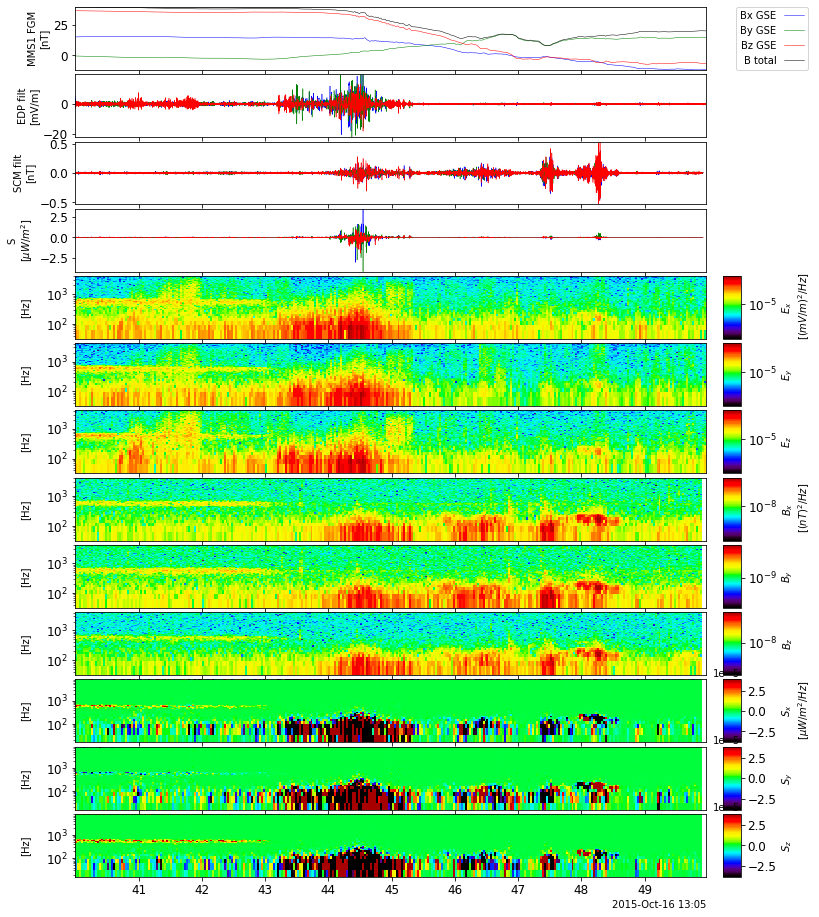

In [49]:
tplot([mag_name,
       edp_name+'_filt',
       scm_name+'_filt',
       'S_timeseries',
      # 'S_tot1', # this one doesn't actually show up on the IDL figure
       'edp_fft_x', 
       'edp_fft_y',
       'edp_fft_z',
       'scm_fft_x',
       'scm_fft_y',
       'scm_fft_z',
       'S_x',
       'S_y',
       'S_z'],
      xsize=12, ysize=16)

Poynting vector calculations in FAC

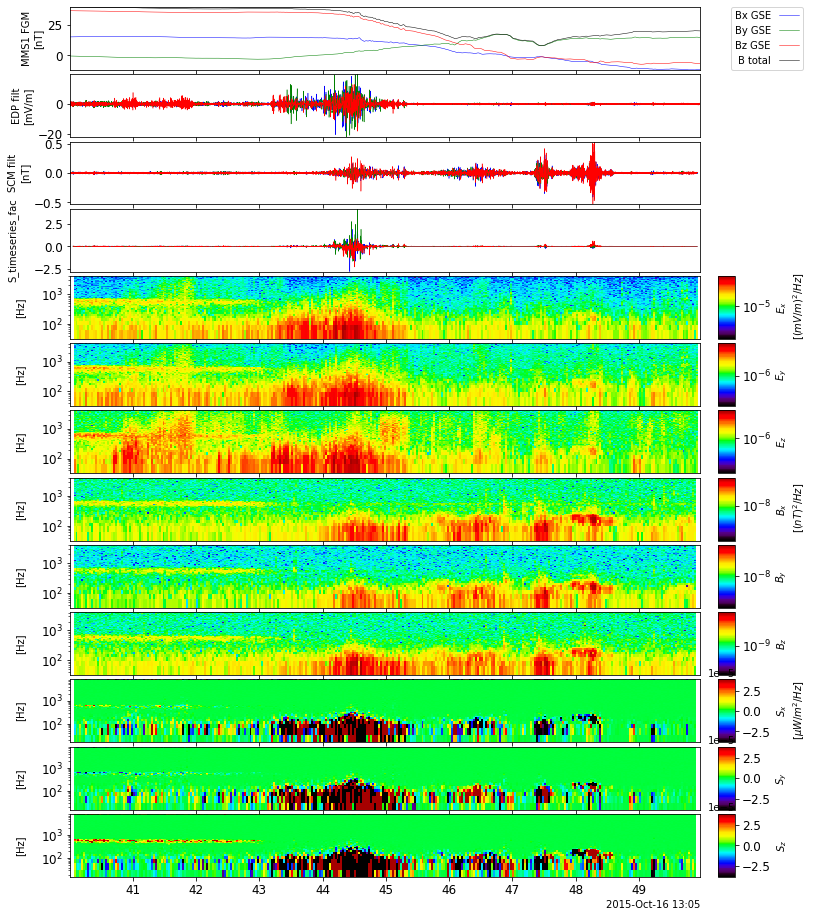

In [50]:
tplot([mag_name,
       edp_name+'_filt',
       scm_name+'_filt',
       'S_timeseries_fac',
       # 'S_fac_tot1', # this one doesn't actually show up on the IDL figure
       'edp_fft_fac_x', 
       'edp_fft_fac_y',
       'edp_fft_fac_z',
       'scm_fft_fac_x',
       'scm_fft_fac_y',
       'scm_fft_fac_z',
       'S_fac_x',
       'S_fac_y',
       'S_fac_z'],
       xsize=12, ysize=16)